Comparing the data across the 4 different dimensions (i.e. the measurements).

1. Exploring the data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1.Read the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/iris.csv')

print(data.head())
print(data.tail())
print(data.describe())
print(data.sum())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
     sepal.length  sepal.width  petal.length  petal.width    variety
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066   

2. Now, let's create a summary dataframe by calculating the mean measurements for each iris variety and adding three columns, one for each variety, containing the mean measurements. Transpose the dataframe to ensure each metric has its own column and each row represents a variety


In [ ]:
summary_data = pd.DataFrame()
summary_data['Setosa'] = data[data['variety'] == 'Setosa'].mean()
summary_data['Versicolor'] = data[data['variety'] == 'Versicolor'].mean()
summary_data['Virginica'] = data[data['variety'] == 'Virginica'].mean()

summary_data = summary_data.transpose()
print(summary_data.head())


            sepal.length  sepal.width  petal.length  petal.width
Setosa             5.006        3.428         1.462        0.246
Versicolor         5.936        2.770         4.260        1.326
Virginica          6.588        2.974         5.552        2.026


<ipython-input-2-5170bcd62f47>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  summary_data['Setosa'] = data[data['variety'] == 'Setosa'].mean()
<ipython-input-2-5170bcd62f47>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  summary_data['Versicolor'] = data[data['variety'] == 'Versicolor'].mean()
<ipython-input-2-5170bcd62f47>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only va

3. Next, let's create a visualization comprising three radar subplots, one for each iris variety. Each radar plot will display the mean lengths and widths for that variety.



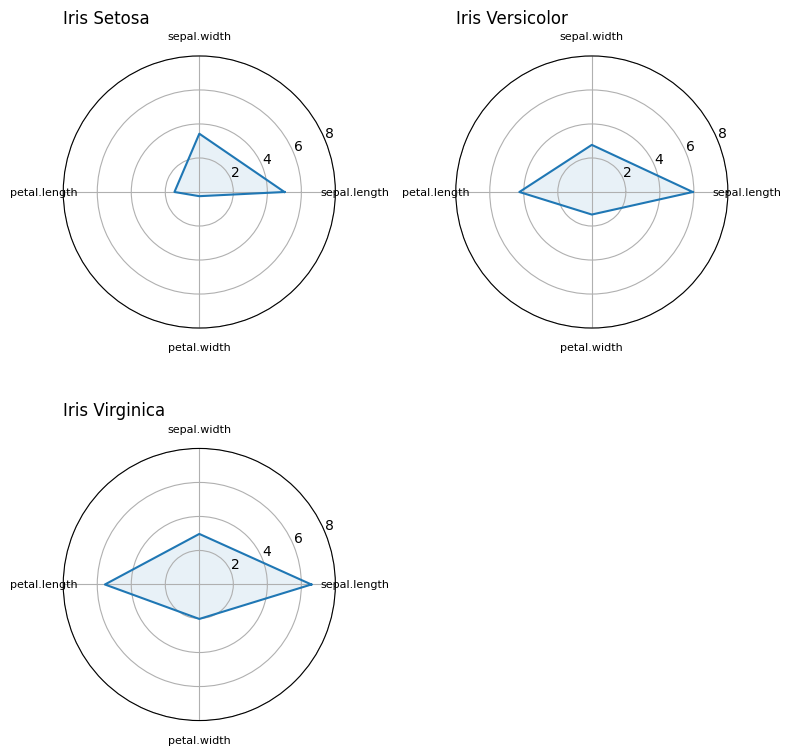

In [ ]:
selected = ['Setosa', 'Versicolor', 'Virginica']
normalised_data = summary_data

angles = [n / float(len(summary_data.columns)) * 2 * np.pi for n in range(len(summary_data.columns) + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
  values = normalised_data.loc[[name]].values.flatten().tolist()
  values += values[:1]
  sub = plt.subplot(2, 2, counter, polar=True)
  sub.plot(angles, values)
  sub.fill(angles, values, alpha=0.1)
  sub.set_yticks([2, 4, 6, 8])
  sub.set_xticks(angles[0:-1])
  sub.set_xticklabels(summary_data.columns, fontsize=8)
  sub.set_title('Iris ' + name, fontsize=12, loc='left')
  counter += 1
plt.tight_layout()
plt.show()


4. Finally, let's create a comparative bar chart to compare these metrics.


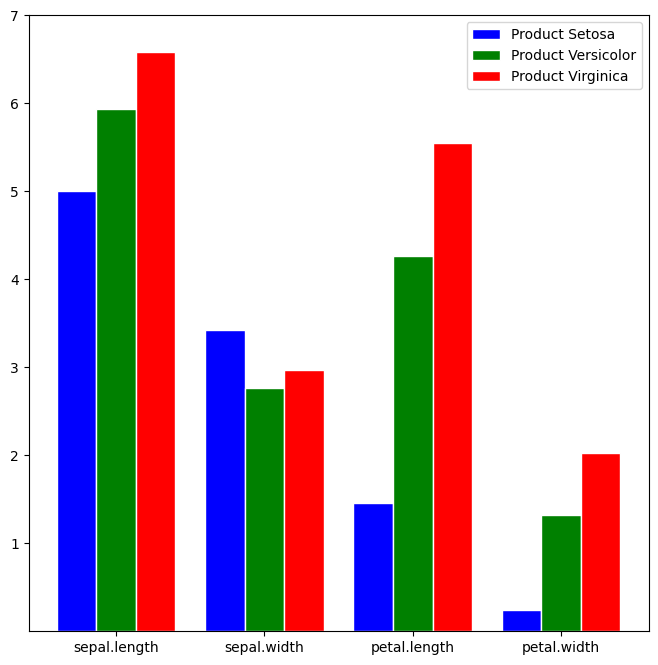

In [ ]:
selected = ['Setosa', 'Versicolor', 'Virginica']

colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(8, 8))
c = 0
n_bars = len(selected)
x_pos_base = np.arange(len(summary_data.columns))
bar_width = 0.8 / n_bars
for name in selected:
  values = normalised_data.loc[[name]].values.flatten().tolist()
  x_pos = [x + (bar_width * c) for x in x_pos_base]
  plt.bar(x_pos, values, color=colours[c % len(colours)], width=bar_width, edgecolor='white', label='Product ' + name)
  c += 1
plt.yticks([1, 2, 3, 4, 5, 6, 7])
x_pos = [x + (bar_width * (c - 1) / 2) for x in x_pos_base]
plt.xticks(x_pos, summary_data.columns)
plt.legend()
plt.show()
